In [1]:
import sys
sys.executable



'c:\\Users\\Casper\\Desktop\\RLveZS\\rlvezs_env\\Scripts\\python.exe'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# src dosyasından simülasyon fonksiyonunu alıyoruz
import sys
import os

sys.path.append(os.path.join(os.getcwd(), ".."))
from src.data_simulation import simulate_production_line_advanced







In [2]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), ".."))

from src.data_simulation import simulate_production_line_advanced


In [3]:
df = simulate_production_line_advanced(T=2000)
df.head()

c:\Users\Casper\Desktop\RLveZS\notebooks\..\src\data_simulation.py:296: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["lead_time"] = (df["wip_total"] / safe_completed).fillna(method="ffill").fillna(


,time,step,hour,shift_id,normal_queue,priority_queue,wip_total,completed_jobs,defect_rate,defects,...,machine_A_speed,machine_B_speed,machine_C_speed,maintenance_A,maintenance_B,maintenance_C,demand_spike_flag,queue_length,lead_time,machine_status
0,0.0,0,0,3,7.0,0.0,7.0,5,0.082489,0,...,2.319144,1.780925,1.178936,0,0,0,0,7.0,1.4,1.0
1,1.0,1,0,3,3.0,0.0,3.0,5,0.082611,0,...,2.166149,1.562310,0.929916,0,0,0,0,3.0,0.6,1.0
2,2.0,2,0,3,0.0,0.0,0.0,3,0.082709,0,...,1.997636,1.812255,1.099372,0,0,0,0,0.0,0.0,1.0
3,3.0,3,0,3,0.0,0.0,0.0,2,0.082782,0,...,2.066750,1.783581,1.280313,0,0,0,0,0.0,0.0,1.0
4,4.0,4,0,3,0.0,0.0,0.0,1,0.082828,0,...,1.892805,1.543757,1.344203,0,0,0,0,0.0,0.0,1.0


In [4]:
os.makedirs("../data/simulated", exist_ok=True)
df.to_csv("../data/simulated/line_data.csv", index=False)

df.shape, df.isna().sum()


((2000, 27),
 time                  0
 step                  0
 hour                  0
 shift_id              0
 normal_queue          0
 priority_queue        0
 wip_total             0
 completed_jobs        0
 defect_rate           0
 defects               0
 energy_consumption    0
 operator_load         0
 operator_skill        0
 operator_fatigue      0
 machine_A_status      0
 machine_B_status      0
 machine_C_status      0
 machine_A_speed       0
 machine_B_speed       0
 machine_C_speed       0
 maintenance_A         0
 maintenance_B         0
 maintenance_C         0
 demand_spike_flag     0
 queue_length          0
 lead_time             0
 machine_status        0
 dtype: int64)

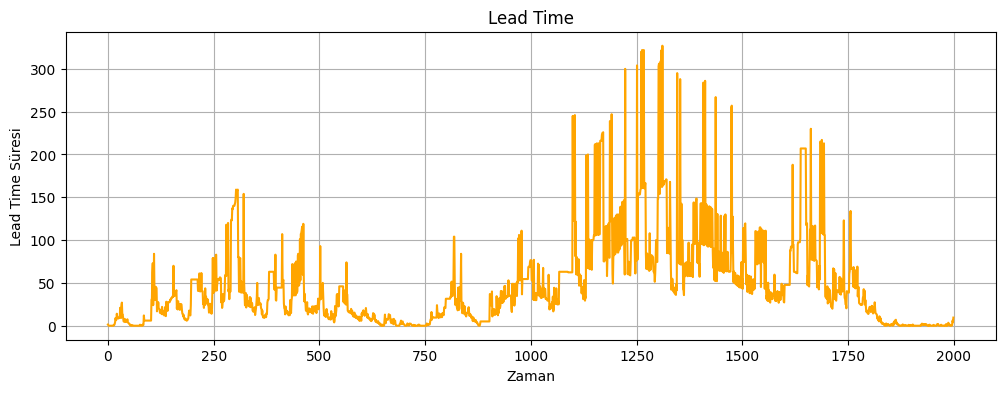

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df["lead_time"], color="orange")
plt.title("Lead Time")
plt.xlabel("Zaman")
plt.ylabel("Lead Time Süresi")
plt.grid()
plt.show()


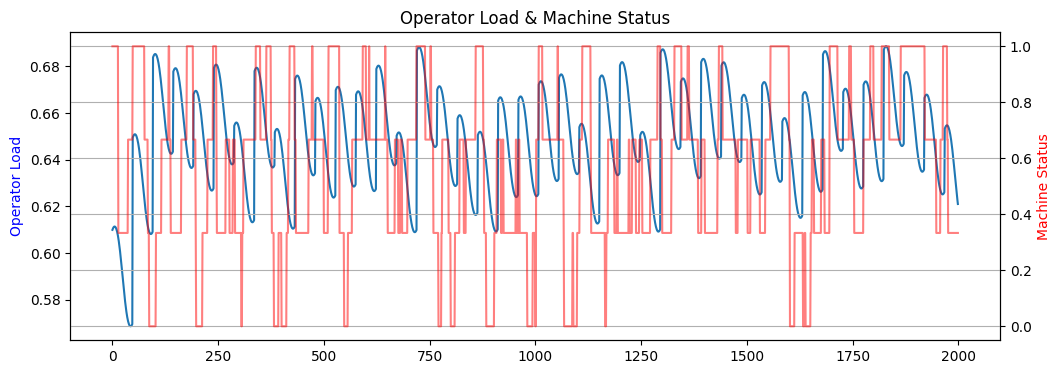

In [6]:
fig, ax1 = plt.subplots(figsize=(12,4))

ax1.plot(df["operator_load"], label="Operator Load")
ax1.set_ylabel("Operator Load", color="blue")

ax2 = ax1.twinx()
ax2.plot(df["machine_status"], color="red", alpha=0.5, label="Machine Status")
ax2.set_ylabel("Machine Status", color="red")

plt.title("Operator Load & Machine Status")
plt.grid()
plt.show()
